In [35]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
from scipy.stats import mode
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
#Reading Train and Test Files
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
trainad=pd.read_csv('Train_AdditionalData.csv')
testad=pd.read_csv('Test_AdditionalData.csv')

In [88]:
#Printing size of the data
print('train size:',train.shape)
print('test size:',test.shape)
print('train additional size:',trainad.shape)
print('test additional size:',testad.shape)

train size: (3156, 22)
test size: (1053, 21)
train additional size: (2065, 2)
test additional size: (699, 2)


## Data analysis and wrangling

In [89]:
train.head()

,ID,y,Number of Cylinders,material grade,Lubrication,Valve Type,Bearing Vendor,Fuel Type,Compression ratio,cam arrangement,...,Varaible Valve Timing (VVT),Cylinder deactivation,Direct injection,main bearing type,displacement,piston type,Max. Torque,Peak Power,Crankshaft Design,Liner Design
0,1,pass,6.0,a,L4,C,V4,gasoline,low,SOHC,...,Yes,No,Yes,Roller,high,linear,high,high,CD2,LD1
1,2,fail,6.0,b,L4,C,V3,gasoline,high,SOHC,...,Yes,No,Yes,Roller,high,linear,high,high,CD1,LD1
2,3,pass,4.0,NaN,L3,D,V2,gasoline,high,SOHC,...,Yes,Yes,Yes,Roller,high,linear,high,high,CD1,LD1
3,4,pass,4.0,f,L2,D,NaN,gasoline,low,SOHC,...,Yes,Yes,Yes,Roller,high,linear,high,high,CD1,LD1
4,5,fail,8.0,d,L2,NaN,V2,gasoline,high,SOHC,...,Yes,No,Yes,Roller,high,linear,high,high,CD1,LD2


In [90]:
train.dtypes

ID                               int64
y                               object
Number of Cylinders            float64
material grade                  object
Lubrication                     object
Valve Type                      object
Bearing Vendor                  object
Fuel Type                       object
Compression ratio               object
cam arrangement                 object
Cylinder arragement             object
Turbocharger                    object
Varaible Valve Timing (VVT)     object
Cylinder deactivation           object
Direct injection                object
main bearing type               object
displacement                    object
piston type                     object
Max. Torque                     object
Peak Power                      object
Crankshaft Design               object
Liner Design                    object
dtype: object

In [91]:
train.columns

Index(['ID', 'y', 'Number of Cylinders', 'material grade', 'Lubrication',
       'Valve Type', 'Bearing Vendor', 'Fuel Type', 'Compression ratio',
       'cam arrangement', 'Cylinder arragement', 'Turbocharger',
       'Varaible Valve Timing (VVT)', 'Cylinder deactivation',
       'Direct injection', 'main bearing type', 'displacement', 'piston type',
       'Max. Torque', 'Peak Power', 'Crankshaft Design', 'Liner Design '],
      dtype='object')

In [92]:
train.describe(include=['O'])

,y,material grade,Lubrication,Valve Type,Bearing Vendor,Fuel Type,Compression ratio,cam arrangement,Cylinder arragement,Turbocharger,Varaible Valve Timing (VVT),Cylinder deactivation,Direct injection,main bearing type,displacement,piston type,Max. Torque,Peak Power,Crankshaft Design,Liner Design
count,3156,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998
unique,2,7,4,4,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,pass,c,L4,B,V2,gasoline,low,SOHC,inline,Yes,Yes,No,Yes,Roller,high,linear,high,high,CD1,LD1
freq,1628,1404,784,811,558,2873,1776,2959,2352,2958,2993,1871,2606,2996,2990,2971,2910,2414,2607,2121


In [93]:
#Merging train and train with additional data 
trainwithad = pd.merge(train, trainad,  how='left',left_on=['ID'], right_on = ['TestA'])

In [94]:
trainwithad=trainwithad.drop('TestB',axis=1)

In [96]:
trainwithadB = pd.merge(train, trainad,  how='left',left_on=['ID'], right_on = ['TestB'])

In [97]:
trainwithad=pd.concat([trainwithad,trainwithadB['TestB']],axis=1)

In [98]:
#Merging test and test with additional data
testwithad = pd.merge(test, testad,  how='left',left_on=['ID'], right_on = ['TestA'])

In [99]:
testwithad=testwithad.drop('TestB',axis=1)

In [100]:
testwithadB = pd.merge(test, testad,  how='left',left_on=['ID'], right_on = ['TestB'])

In [101]:
testwithad=pd.concat([testwithad,testwithadB['TestB']],axis=1)


In [102]:
trainwithad.head()

,ID,y,Number of Cylinders,material grade,Lubrication,Valve Type,Bearing Vendor,Fuel Type,Compression ratio,cam arrangement,...,Direct injection,main bearing type,displacement,piston type,Max. Torque,Peak Power,Crankshaft Design,Liner Design,TestA,TestB
0,1,pass,6.0,a,L4,C,V4,gasoline,low,SOHC,...,Yes,Roller,high,linear,high,high,CD2,LD1,1.0,1.0
1,2,fail,6.0,b,L4,C,V3,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,2.0,NaN
2,3,pass,4.0,NaN,L3,D,V2,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,3.0,3.0
3,4,pass,4.0,f,L2,D,NaN,gasoline,low,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,4.0,4.0
4,5,fail,8.0,d,L2,NaN,V2,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD2,NaN,5.0


In [103]:
testwithad.head()

,ID,Number of Cylinders,material grade,Lubrication,Valve Type,Bearing Vendor,Fuel Type,Compression ratio,cam arrangement,Cylinder arragement,...,Direct injection,main bearing type,displacement,piston type,Max. Torque,Peak Power,Crankshaft Design,Liner Design,TestA,TestB
0,5001,4.0,NaN,L1,A,V2,gasoline,high,SOHC,inline,...,Yes,Roller,high,linear,high,low,CD1,LD1,NaN,5001.0
1,5002,8.0,e,L1,B,V1,gasoline,high,SOHC,V,...,Yes,Roller,high,linear,high,high,CD1,LD2,NaN,5002.0
2,5003,8.0,NaN,L1,B,V3,gasoline,NaN,SOHC,inline,...,Yes,Roller,high,linear,high,high,CD1,LD2,5003.0,5003.0
3,5004,8.0,c,L1,A,V2,gasoline,high,SOHC,inline,...,Yes,Roller,high,linear,high,low,CD1,LD2,5004.0,NaN
4,5005,4.0,f,NaN,D,V5,petrol,high,SOHC,inline,...,Yes,Roller,high,linear,high,high,CD1,LD1,5005.0,NaN


In [104]:
#Checking the distribution of y column for train data
trainwithad.y.value_counts()

pass    1628
fail    1528
Name: y, dtype: int64

In [105]:
#Encoding the Target Variable y with pass as 1 and fail as 0
trainwithad['y']=trainwithad['y'].map({'pass':1,'fail':0}).astype(int)

In [106]:
#Converting Number of Cylinders attribute to categorical in both train and test
trainwithad['Number of Cylinders']=trainwithad['Number of Cylinders'].astype('object')
testwithad['Number of Cylinders']=testwithad['Number of Cylinders'].astype('object')

In [107]:
trainwithad['Number of Cylinders'].value_counts()

4.0    1164
8.0     983
6.0     851
Name: Number of Cylinders, dtype: int64

In [108]:
trainwithad.dtypes

ID                              object
y                                int32
Number of Cylinders             object
material grade                  object
Lubrication                     object
Valve Type                      object
Bearing Vendor                  object
Fuel Type                       object
Compression ratio               object
cam arrangement                 object
Cylinder arragement             object
Turbocharger                    object
Varaible Valve Timing (VVT)     object
Cylinder deactivation           object
Direct injection                object
main bearing type               object
displacement                    object
piston type                     object
Max. Torque                     object
Peak Power                      object
Crankshaft Design               object
Liner Design                    object
TestA                          float64
TestB                          float64
dtype: object

## Visualizations

In [109]:
trainwithad.columns

Index(['ID', 'y', 'Number of Cylinders', 'material grade', 'Lubrication',
       'Valve Type', 'Bearing Vendor', 'Fuel Type', 'Compression ratio',
       'cam arrangement', 'Cylinder arragement', 'Turbocharger',
       'Varaible Valve Timing (VVT)', 'Cylinder deactivation',
       'Direct injection', 'main bearing type', 'displacement', 'piston type',
       'Max. Torque', 'Peak Power', 'Crankshaft Design', 'Liner Design ',
       'TestA', 'TestB'],
      dtype='object')

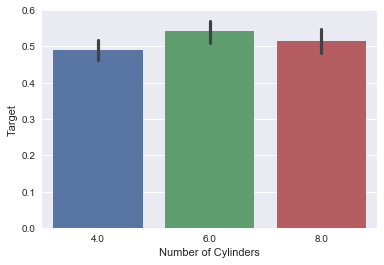

In [110]:
#Plotting barplot of Number of Cylinders with respect to Target
sns.barplot(x='Number of Cylinders', y='y', data=trainwithad)
plt.ylabel('Target')

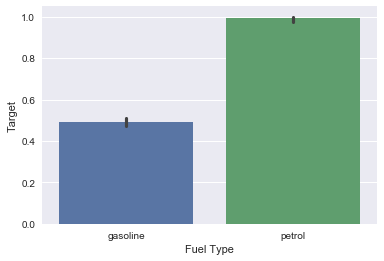

In [111]:
#Plotting barplot of Fuel Type with respect to Target
sns.barplot(x='Fuel Type', y='y', data=trainwithad)
plt.ylabel('Target')

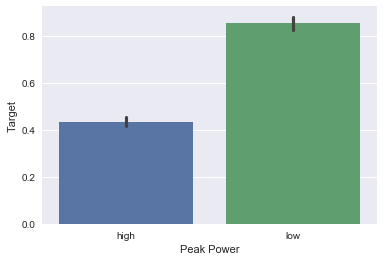

In [112]:
#Plotting barplot of Peak Power with respect to Target
sns.barplot(x='Peak Power', y='y', data=trainwithad)
plt.ylabel('Target')

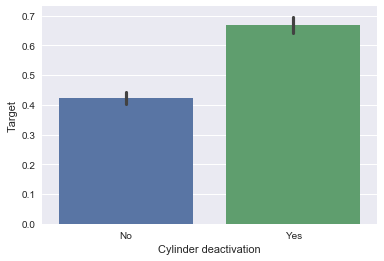

In [113]:
#Plotting barplot of Cylinder deactivation with respect to Target
sns.barplot(x='Cylinder deactivation', y='y', data=trainwithad)
plt.ylabel('Target')

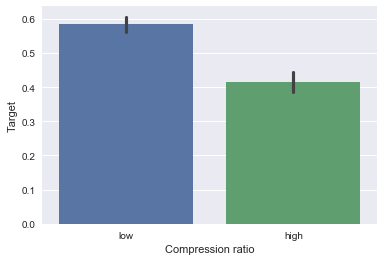

In [114]:
#Plotting barplot of Compression Ratio with respect to Target
sns.barplot(x='Compression ratio', y='y', data=trainwithad)
plt.ylabel('Target')

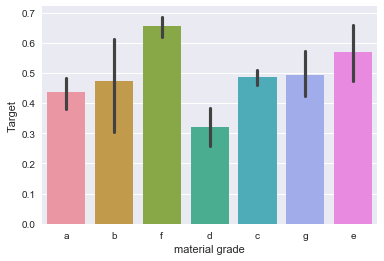

In [115]:
#Plotting barplot of Material grade with respect to Target
sns.barplot(x='material grade', y='y', data=trainwithad)
plt.ylabel('Target')

## Dealing with missing values

In [116]:
#Checking for null values in train data
trainwithad.isnull().sum()

ID                                0
y                                 0
Number of Cylinders             158
material grade                  158
Lubrication                     158
Valve Type                      158
Bearing Vendor                  158
Fuel Type                       158
Compression ratio               158
cam arrangement                 158
Cylinder arragement             158
Turbocharger                    158
Varaible Valve Timing (VVT)     158
Cylinder deactivation           158
Direct injection                158
main bearing type               158
displacement                    158
piston type                     158
Max. Torque                     158
Peak Power                      158
Crankshaft Design               158
Liner Design                    158
TestA                          1130
TestB                          1091
dtype: int64

In [117]:
#Calculating missing Values percentage for train
round(100*(trainwithad.isnull().sum()/len(trainwithad.index)), 2)

ID                              0.00
y                               0.00
Number of Cylinders             5.01
material grade                  5.01
Lubrication                     5.01
Valve Type                      5.01
Bearing Vendor                  5.01
Fuel Type                       5.01
Compression ratio               5.01
cam arrangement                 5.01
Cylinder arragement             5.01
Turbocharger                    5.01
Varaible Valve Timing (VVT)     5.01
Cylinder deactivation           5.01
Direct injection                5.01
main bearing type               5.01
displacement                    5.01
piston type                     5.01
Max. Torque                     5.01
Peak Power                      5.01
Crankshaft Design               5.01
Liner Design                    5.01
TestA                          35.80
TestB                          34.57
dtype: float64

In [118]:
# Replacing nulls in Test A and Test B with 0
trainwithad.loc[pd.isnull(trainwithad['TestA']),['TestA']] = 0
trainwithad.loc[pd.isnull(trainwithad['TestB']),['TestB']] = 0

In [119]:
catcols=trainwithad.select_dtypes(include=['object']).columns

In [120]:
# Replacing missing values in categorical columns with mode
trainwithad[catcols]=trainwithad[catcols].fillna(trainwithad.mode().iloc[0])

In [121]:
#Checking missing values in train after Imputation
round(100*(trainwithad.isnull().sum()/len(trainwithad.index)), 2)

ID                             0.0
y                              0.0
Number of Cylinders            0.0
material grade                 0.0
Lubrication                    0.0
Valve Type                     0.0
Bearing Vendor                 0.0
Fuel Type                      0.0
Compression ratio              0.0
cam arrangement                0.0
Cylinder arragement            0.0
Turbocharger                   0.0
Varaible Valve Timing (VVT)    0.0
Cylinder deactivation          0.0
Direct injection               0.0
main bearing type              0.0
displacement                   0.0
piston type                    0.0
Max. Torque                    0.0
Peak Power                     0.0
Crankshaft Design              0.0
Liner Design                   0.0
TestA                          0.0
TestB                          0.0
dtype: float64

In [122]:
#Calculating missing Values percentage for test data
round(100*(testwithad.isnull().sum()/len(testwithad.index)), 2)

ID                              0.00
Number of Cylinders             5.03
material grade                  5.03
Lubrication                     5.03
Valve Type                      5.03
Bearing Vendor                  5.03
Fuel Type                       5.03
Compression ratio               5.03
cam arrangement                 5.03
Cylinder arragement             5.03
Turbocharger                    5.03
Varaible Valve Timing (VVT)     5.03
Cylinder deactivation           5.03
Direct injection                5.03
main bearing type               5.03
displacement                    5.03
piston type                     5.03
Max. Torque                     5.03
Peak Power                      5.03
Crankshaft Design               5.03
Liner Design                    5.03
TestA                          33.62
TestB                          34.85
dtype: float64

In [123]:
# Replacing blanks in Test A and Test B with 0
testwithad.loc[pd.isnull(testwithad['TestA']),['TestA']] = 0
testwithad.loc[pd.isnull(testwithad['TestB']),['TestB']] = 0

In [124]:
# Replacing missing values in categorical columns with mode
catcols=testwithad.select_dtypes(include=['object']).columns
testwithad[catcols]=testwithad[catcols].fillna(testwithad.mode().iloc[0])

In [125]:
#Checking missing values in test after Imputation
round(100*(testwithad.isnull().sum()/len(testwithad.index)), 2)

ID                             0.0
Number of Cylinders            0.0
material grade                 0.0
Lubrication                    0.0
Valve Type                     0.0
Bearing Vendor                 0.0
Fuel Type                      0.0
Compression ratio              0.0
cam arrangement                0.0
Cylinder arragement            0.0
Turbocharger                   0.0
Varaible Valve Timing (VVT)    0.0
Cylinder deactivation          0.0
Direct injection               0.0
main bearing type              0.0
displacement                   0.0
piston type                    0.0
Max. Torque                    0.0
Peak Power                     0.0
Crankshaft Design              0.0
Liner Design                   0.0
TestA                          0.0
TestB                          0.0
dtype: float64

In [126]:
#Converting Number of cylinders attribute to Categorical
trainwithad['Number of Cylinders']=trainwithad['Number of Cylinders'].astype('object')
testwithad['Number of Cylinders']=testwithad['Number of Cylinders'].astype('object')

In [127]:
trainwithad.dtypes

ID                               int64
y                                int32
Number of Cylinders             object
material grade                  object
Lubrication                     object
Valve Type                      object
Bearing Vendor                  object
Fuel Type                       object
Compression ratio               object
cam arrangement                 object
Cylinder arragement             object
Turbocharger                    object
Varaible Valve Timing (VVT)     object
Cylinder deactivation           object
Direct injection                object
main bearing type               object
displacement                    object
piston type                     object
Max. Torque                     object
Peak Power                      object
Crankshaft Design               object
Liner Design                    object
TestA                          float64
TestB                          float64
dtype: object

In [128]:
#Encoding TestA and TestB with 1 and 0 for the IDs Present in Train data
trainwithad['TestA']=trainwithad['TestA'].apply(lambda x : 1 if x!=0 else 0)
trainwithad['TestB']=trainwithad['TestB'].apply(lambda x : 1 if x!=0 else 0)

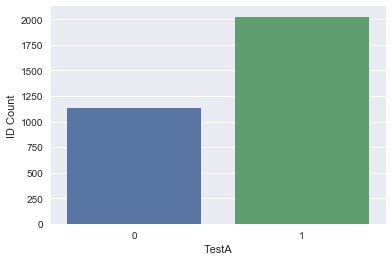

In [144]:
#Plot showing number of IDs Passed and Fail for TestA in train data
sns.countplot('TestA',data=trainfinal)
plt.ylabel('ID Count')

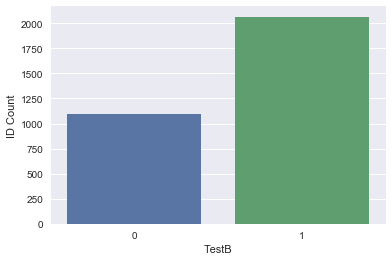

In [145]:
#Plot showing number of IDs Passed and Fail for TestB in train data
sns.countplot('TestB',data=trainfinal)
plt.ylabel('ID Count')

In [129]:
#Encoding TestA and TestB with 1 and 0 for the IDs Present in Test data
testwithad['TestA']=testwithad['TestA'].apply(lambda x : 1 if x!=0 else 0)
testwithad['TestB']=testwithad['TestB'].apply(lambda x : 1 if x!=0 else 0)

In [130]:
trainwithad.head()

,ID,y,Number of Cylinders,material grade,Lubrication,Valve Type,Bearing Vendor,Fuel Type,Compression ratio,cam arrangement,...,Direct injection,main bearing type,displacement,piston type,Max. Torque,Peak Power,Crankshaft Design,Liner Design,TestA,TestB
0,1,1,6,a,L4,C,V4,gasoline,low,SOHC,...,Yes,Roller,high,linear,high,high,CD2,LD1,1,1
1,2,0,6,b,L4,C,V3,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,1,0
2,3,1,4,c,L3,D,V2,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,1,1
3,4,1,4,f,L2,D,V2,gasoline,low,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,1,1
4,5,0,8,d,L2,B,V2,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD2,0,1


In [131]:
testwithad.head(10)

,ID,Number of Cylinders,material grade,Lubrication,Valve Type,Bearing Vendor,Fuel Type,Compression ratio,cam arrangement,Cylinder arragement,...,Direct injection,main bearing type,displacement,piston type,Max. Torque,Peak Power,Crankshaft Design,Liner Design,TestA,TestB
0,5001,4,c,L1,A,V2,gasoline,high,SOHC,inline,...,Yes,Roller,high,linear,high,low,CD1,LD1,0,1
1,5002,8,e,L1,B,V1,gasoline,high,SOHC,V,...,Yes,Roller,high,linear,high,high,CD1,LD2,0,1
2,5003,8,c,L1,B,V3,gasoline,low,SOHC,inline,...,Yes,Roller,high,linear,high,high,CD1,LD2,1,1
3,5004,8,c,L1,A,V2,gasoline,high,SOHC,inline,...,Yes,Roller,high,linear,high,low,CD1,LD2,1,0
4,5005,4,f,L4,D,V5,petrol,high,SOHC,inline,...,Yes,Roller,high,linear,high,high,CD1,LD1,1,0
5,5006,6,c,L1,C,V5,gasoline,low,SOHC,inline,...,No,Roller,high,linear,high,high,CD1,LD1,0,1
6,5007,6,f,L1,D,V6,gasoline,high,SOHC,inline,...,Yes,Roller,high,linear,high,high,CD1,LD2,1,0
7,5008,4,f,L4,D,V5,petrol,high,SOHC,inline,...,Yes,Roller,high,linear,high,high,CD1,LD1,0,1
8,5009,4,b,L1,B,V5,gasoline,high,SOHC,inline,...,No,Roller,high,linear,low,high,CD1,LD1,0,1
9,5010,4,f,L4,A,V4,gasoline,low,SOHC,V,...,Yes,Roller,high,linear,high,high,CD1,LD2,1,0


In [132]:
print(trainwithad.shape)
print(testwithad.shape)

(3156, 24)
(1053, 23)


In [133]:
# Dropping ID and Target columns
trainfinal=trainwithad.drop(['ID','y'],axis=1)

In [134]:
trainfinal.shape

(3156, 22)

In [135]:
trainfinal.columns

Index(['Number of Cylinders', 'material grade', 'Lubrication', 'Valve Type',
       'Bearing Vendor', 'Fuel Type', 'Compression ratio', 'cam arrangement',
       'Cylinder arragement', 'Turbocharger', 'Varaible Valve Timing (VVT)',
       'Cylinder deactivation', 'Direct injection', 'main bearing type',
       'displacement', 'piston type', 'Max. Torque', 'Peak Power',
       'Crankshaft Design', 'Liner Design ', 'TestA', 'TestB'],
      dtype='object')

In [136]:
testfinal=testwithad.drop('ID',axis=1)

In [137]:
testfinal.shape

(1053, 22)

In [138]:
#Encoding categorical data to dummy variables in train data
trainfinal=pd.get_dummies(trainfinal)

In [139]:
trainfinal.shape

(3156, 56)

In [140]:
trainfinal.head()

,TestA,TestB,Number of Cylinders_4.0,Number of Cylinders_6.0,Number of Cylinders_8.0,material grade_a,material grade_b,material grade_c,material grade_d,material grade_e,...,piston type_linear,piston type_rotary,Max. Torque_high,Max. Torque_low,Peak Power_high,Peak Power_low,Crankshaft Design_CD1,Crankshaft Design_CD2,Liner Design _LD1,Liner Design _LD2
0,1,1,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
1,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,1,1,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,1,1,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,1,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1


In [141]:
#Encoding categorical data to dummy variables in test data
testfinal=pd.get_dummies(testfinal)

In [142]:
testfinal.shape

(1053, 55)

In [143]:
testfinal.head()

,TestA,TestB,Number of Cylinders_4.0,Number of Cylinders_6.0,Number of Cylinders_8.0,material grade_a,material grade_b,material grade_c,material grade_d,material grade_e,...,piston type_linear,piston type_rotary,Max. Torque_high,Max. Torque_low,Peak Power_high,Peak Power_low,Crankshaft Design_CD1,Crankshaft Design_CD2,Liner Design _LD1,Liner Design _LD2
0,0,1,1,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
1,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
2,1,1,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
3,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,1,0,0,1
4,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [154]:
#Finding missing columns in train and test after dummification
missing_cols = set( trainfinal.columns ) - set( testfinal.columns )
missing_cols

{'main bearing type_Journal'}

In [155]:
#Filling the missing column with 0 in the test
for c in missing_cols:
    testfinal[c] = 0
testfinal= testfinal[trainfinal.columns]

In [156]:
print(trainfinal.shape)
print(testfinal.shape)

(3156, 56)
(1053, 56)


In [157]:
trainfinal.columns

Index(['TestA', 'TestB', 'Number of Cylinders_4.0', 'Number of Cylinders_6.0',
       'Number of Cylinders_8.0', 'material grade_a', 'material grade_b',
       'material grade_c', 'material grade_d', 'material grade_e',
       'material grade_f', 'material grade_g', 'Lubrication_L1',
       'Lubrication_L2', 'Lubrication_L3', 'Lubrication_L4', 'Valve Type_A',
       'Valve Type_B', 'Valve Type_C', 'Valve Type_D', 'Bearing Vendor_V1',
       'Bearing Vendor_V2', 'Bearing Vendor_V3', 'Bearing Vendor_V4',
       'Bearing Vendor_V5', 'Bearing Vendor_V6', 'Fuel Type_gasoline',
       'Fuel Type_petrol', 'Compression ratio_high', 'Compression ratio_low',
       'cam arrangement_DOHC', 'cam arrangement_SOHC', 'Cylinder arragement_V',
       'Cylinder arragement_inline', 'Turbocharger_No', 'Turbocharger_Yes',
       'Varaible Valve Timing (VVT)_No', 'Varaible Valve Timing (VVT)_Yes',
       'Cylinder deactivation_No', 'Cylinder deactivation_Yes',
       'Direct injection_No', 'Direct injection

In [158]:
testfinal.columns

Index(['TestA', 'TestB', 'Number of Cylinders_4.0', 'Number of Cylinders_6.0',
       'Number of Cylinders_8.0', 'material grade_a', 'material grade_b',
       'material grade_c', 'material grade_d', 'material grade_e',
       'material grade_f', 'material grade_g', 'Lubrication_L1',
       'Lubrication_L2', 'Lubrication_L3', 'Lubrication_L4', 'Valve Type_A',
       'Valve Type_B', 'Valve Type_C', 'Valve Type_D', 'Bearing Vendor_V1',
       'Bearing Vendor_V2', 'Bearing Vendor_V3', 'Bearing Vendor_V4',
       'Bearing Vendor_V5', 'Bearing Vendor_V6', 'Fuel Type_gasoline',
       'Fuel Type_petrol', 'Compression ratio_high', 'Compression ratio_low',
       'cam arrangement_DOHC', 'cam arrangement_SOHC', 'Cylinder arragement_V',
       'Cylinder arragement_inline', 'Turbocharger_No', 'Turbocharger_Yes',
       'Varaible Valve Timing (VVT)_No', 'Varaible Valve Timing (VVT)_Yes',
       'Cylinder deactivation_No', 'Cylinder deactivation_Yes',
       'Direct injection_No', 'Direct injection

## Building different models

In [159]:
#Splitting data into X(input) and y(output) variables for model building
X=trainfinal.values
y=trainwithad['y'].values

In [160]:
#Splitting Train data into train and test splits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [161]:
#Importing Decision Tree model and Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [162]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [163]:
#Doing predictions on test data
predtree=dtree.predict(X_test)

In [164]:
print('Decision Tree Accuracy:',accuracy_score(y_test,predtree))
acc_dtree=accuracy_score(y_test,predtree)

Decision Tree Accuracy: 0.79303062302


In [165]:
#Performing 10 fold cross validation on Decision Tree
scoredtree=cross_val_score(dtree,X,y,cv=10,scoring='accuracy')
print('Cross validation score Decision Tree:',scoredtree.mean())

Cross validation score Decision Tree: 0.797849310651


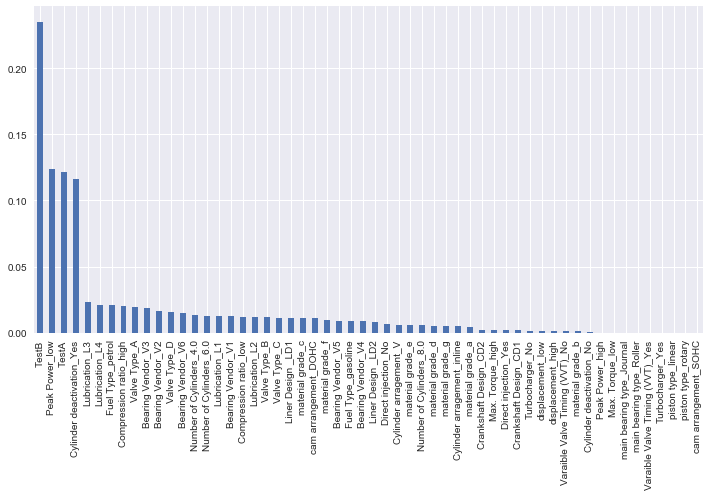

In [166]:
#Plotting the features and showing its importance
pd.Series(dtree.feature_importances_,index=trainfinal.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

In [167]:
#Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
#Doing predictions on test data
predlogreg=lr.predict(X_test)

In [169]:
print('Logistic Regression Accuracy:',accuracy_score(y_test,predlogreg))
acc_log=accuracy_score(y_test,predlogreg)

Logistic Regression Accuracy: 0.86166842661


In [170]:
#Performing 10 fold cross validation on Logistic Regression
scorelr=cross_val_score(lr,X,y,cv=10,scoring='accuracy')
print('Cross validation score Logistic Regression:',scorelr.mean())

Cross validation score Logistic Regression: 0.867267999677


In [171]:
#Importing Support Vector Machines model
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [172]:
#Doing predictions on test data
predsvm=svm.predict(X_test)
print('SVM Accuracy:',accuracy_score(y_test,predsvm))
acc_svm=accuracy_score(y_test,predsvm)

SVM Accuracy: 0.856388595565


In [173]:
#Performing 10 fold cross validation on SVM
scoresvm=cross_val_score(svm,X,y,cv=10,scoring='accuracy')
print('Cross validation score SVM:',scoresvm.mean())

Cross validation score SVM: 0.865052809804


In [174]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=5)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [175]:
#Doing predictions on test data
predrf=rf.predict(X_test)
print('Random Forest Accuracy:',accuracy_score(y_test,predrf))
acc_rf=accuracy_score(y_test,predrf)

Random Forest Accuracy: 0.841605068638


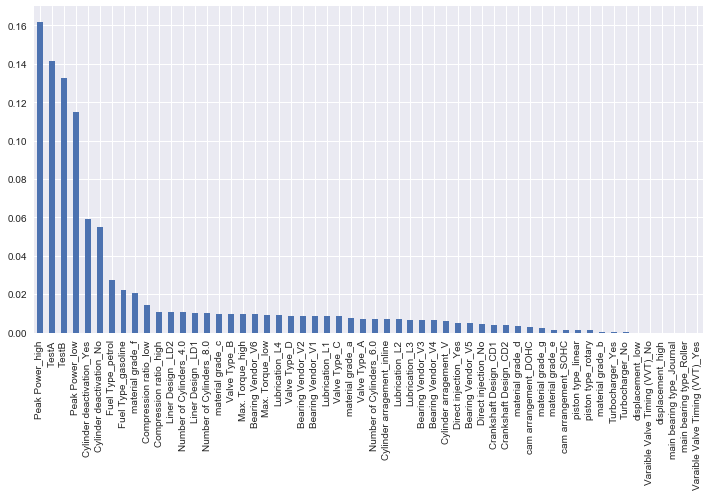

In [176]:
#Plotting the features and showing its importance
pd.Series(rf.feature_importances_,index=trainfinal.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

In [177]:
#Performing 10 fold cross validation on Random Forest
scorerf=cross_val_score(rf,X,y,cv=10,scoring='accuracy')
print('Cross validation score Random Forest:',scorerf.mean())

Cross validation score Random Forest: 0.85744981053


In [178]:
#Importing AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [179]:
#Doing predictions on test data
predada=ad.predict(X_test)
print('AdaBoost Accuracy:',accuracy_score(y_test,predada))
acc_ada=accuracy_score(y_test,predada)

AdaBoost Accuracy: 0.86166842661


In [180]:
#Performing 10 fold cross validation on AdaBoost
scoreada=cross_val_score(ad,X,y,cv=10,scoring='accuracy')
print('Cross validation score Ada Boost:',scoreada.mean())

Cross validation score Ada Boost: 0.866635088285


In [181]:
#Importing Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
grboost=GradientBoostingClassifier()
grboost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [182]:
#Doing predictions on test data
predgrboost=grboost.predict(X_test)
print('Gradient Boost Accuracy:',accuracy_score(y_test,predgrboost))
acc_grboost=accuracy_score(y_test,predgrboost)

Gradient Boost Accuracy: 0.860612460401


In [183]:
#Performing 10 fold cross validation on Gradient Boost
scoregrboost=cross_val_score(grboost,X,y,cv=10,scoring='accuracy')
print('Cross validation score Gradient Boost:',scoregrboost.mean())

Cross validation score Gradient Boost: 0.868221398049


In [184]:
# Creating DataFrame of different Models along with their Accuracy
models = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 
              'Random Forest','Decision Tree','Ada Boost','Grad Boost'],
    'Accuracy': [acc_svm, acc_log, acc_rf, 
              acc_dtree, acc_ada,acc_grboost]})
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Model
1,0.861668,Logistic Regression
4,0.861668,Ada Boost
5,0.860612,Grad Boost
0,0.856389,SVM
2,0.841605,Random Forest
3,0.793031,Decision Tree


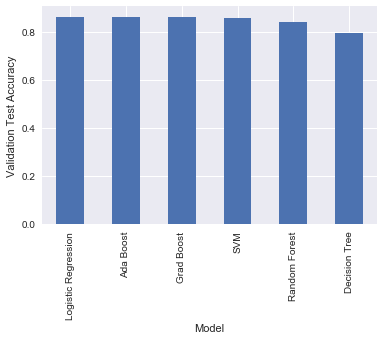

In [185]:
#Plotting different Models Validation Test Accuracy
models.sort_values(by='Accuracy', ascending=False).plot('Model','Accuracy',kind='bar')
plt.ylabel('Validation Test Accuracy')
plt.gca().get_legend().remove()

In [186]:
# Creating DataFrame of different Models along with their 10 Fold Cross Validation Mean Accuracy
KFoldmodels = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 
              'Random Forest','Decision Tree','Ada Boost','Grad Boost'],
    'Mean Accuracy': [scoresvm.mean(), scorelr.mean(), scorerf.mean(), 
              scoredtree.mean(), scoreada.mean(),scoregrboost.mean()]})
KFoldmodels.sort_values(by='Mean Accuracy', ascending=False)

,Mean Accuracy,Model
5,0.868221,Grad Boost
1,0.867268,Logistic Regression
4,0.866635,Ada Boost
0,0.865053,SVM
2,0.857450,Random Forest
3,0.797849,Decision Tree


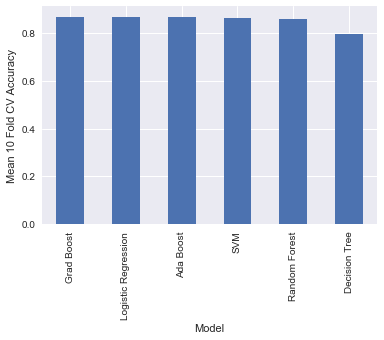

In [187]:
#Plotting different Models 10 Fold Cross Validation Mean Accuracy
KFoldmodels.sort_values(by='Mean Accuracy', ascending=False).plot('Model','Mean Accuracy',kind='bar')
plt.ylabel('Mean 10 Fold CV Accuracy')
plt.gca().get_legend().remove()

## Tuning Models

In [188]:
from sklearn.model_selection import GridSearchCV

In [190]:
#Tuning Decision Tree Model
params ={'min_samples_leaf': list(range(5, 20)),
        'min_samples_split':[2,3,4],
        'max_leaf_nodes':list(range(2,50))}

In [191]:
gridtree = GridSearchCV(dtree, params,cv=10,n_jobs=-1, verbose=1)

In [192]:
# fit the grid with data
gridtree.fit(X, y)

Fitting 10 folds for each of 2160 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 2305 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 4405 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 7105 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 10405 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 14305 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 18805 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 21600 out of 21600 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [193]:
# examine the best model
print(gridtree.best_score_)
print(gridtree.best_params_)
print(gridtree.best_estimator_)

0.865652724968
{'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [194]:
#Tuning Random Forst Model
params   = {"max_depth": [3,5,None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 5, 10],
               "criterion": ['gini', 'entropy']}

In [195]:
gridrf = GridSearchCV(rf,params, n_jobs=-1, cv=10, verbose=1, scoring='accuracy')

In [196]:
gridrf.fit(X, y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.2min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, None], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 5, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [197]:
# examine the best model
print(gridrf.best_score_)
print(gridrf.best_params_)
print(gridrf.best_estimator_)

0.861216730038
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [198]:
##Tuning SVM Model
params = {'C':(0.1, 0.5, 1, 2, 5, 10, 20,30), 
          'gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
           'kernel': ['linear','rbf']} 

In [199]:
gridsvm = GridSearchCV(svm,params, n_jobs=-1, cv=10, verbose=1, scoring='accuracy')

In [200]:
gridsvm.fit(X, y)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  5.9min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': (0.1, 0.5, 1, 2, 5, 10, 20, 30), 'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [201]:
# examine the best model
print(gridsvm.best_score_)
print(gridsvm.best_params_)
print(gridsvm.best_estimator_)

0.867553865653
{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [202]:
##Tuning AdaBoost Model
params = {'learning_rate':(0.01,0.1, 0.5,1), 
          'n_estimators':(50,100,150)}

In [203]:
gridada = GridSearchCV(ad,params, n_jobs=-1, cv=10, verbose=1, scoring='accuracy')

In [204]:
gridada.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   19.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': (0.01, 0.1, 0.5, 1), 'n_estimators': (50, 100, 150)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [205]:
# examine the best model
print(gridada.best_score_)
print(gridada.best_params_)
print(gridada.best_estimator_)

0.867553865653
{'learning_rate': 0.1, 'n_estimators': 150}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=150, random_state=None)


In [206]:
##Tuning Gradient Boost Model
params = {'learning_rate':(0.01,0.1,0.3,0.5,1), 
          'n_estimators':(50,100,150,200),
         "min_samples_leaf": [1,3,5,7,10]}


In [207]:
gridgrboost = GridSearchCV(grboost,params, n_jobs=-1, cv=10, verbose=1, scoring='accuracy')

In [208]:
gridgrboost.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.3min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': (0.01, 0.1, 0.3, 0.5, 1), 'n_estimators': (50, 100, 150, 200), 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [209]:
# examine the best model
print(gridgrboost.best_score_)
print(gridgrboost.best_params_)
print(gridgrboost.best_estimator_)

0.869455006337
{'learning_rate': 0.1, 'min_samples_leaf': 3, 'n_estimators': 100}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [210]:
# Creating DataFrame of different Tuned Models along with their Best Accuracy Score
tunedmodels = pd.DataFrame({
    'Tuned Model': ['SVM','Random Forest','Decision Tree','Ada Boost','Grad Boost'],
    'Best Accuracy Score': [gridsvm.best_score_,gridrf.best_score_,
              gridtree.best_score_, gridada.best_score_,gridgrboost.best_score_]})
tunedmodels.sort_values(by='Best Accuracy Score', ascending=False)

,Best Accuracy Score,Tuned Model
4,0.869455,Grad Boost
0,0.867554,SVM
3,0.867554,Ada Boost
2,0.865653,Decision Tree
1,0.861217,Random Forest


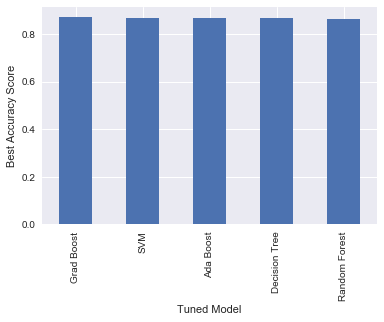

In [211]:
#Plotting different Tuned Models with their Best Accuracy Score
tunedmodels.sort_values(by='Best Accuracy Score', ascending=False).plot('Tuned Model','Best Accuracy Score',kind='bar')
plt.ylabel('Best Accuracy Score')
plt.gca().get_legend().remove()

### Feature Engineering and Tuning Models

In [213]:
#Considering only these features as it has got more importance
features=['Peak Power','Cylinder deactivation','Fuel Type','Compression ratio','material grade']

In [214]:
trainwithad.head()

,ID,y,Number of Cylinders,material grade,Lubrication,Valve Type,Bearing Vendor,Fuel Type,Compression ratio,cam arrangement,...,Direct injection,main bearing type,displacement,piston type,Max. Torque,Peak Power,Crankshaft Design,Liner Design,TestA,TestB
0,1,1,6,a,L4,C,V4,gasoline,low,SOHC,...,Yes,Roller,high,linear,high,high,CD2,LD1,1,1
1,2,0,6,b,L4,C,V3,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,1,0
2,3,1,4,c,L3,D,V2,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,1,1
3,4,1,4,f,L2,D,V2,gasoline,low,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD1,1,1
4,5,0,8,d,L2,B,V2,gasoline,high,SOHC,...,Yes,Roller,high,linear,high,high,CD1,LD2,0,1


In [215]:
testwithad.head()

,ID,Number of Cylinders,material grade,Lubrication,Valve Type,Bearing Vendor,Fuel Type,Compression ratio,cam arrangement,Cylinder arragement,...,Direct injection,main bearing type,displacement,piston type,Max. Torque,Peak Power,Crankshaft Design,Liner Design,TestA,TestB
0,5001,4,c,L1,A,V2,gasoline,high,SOHC,inline,...,Yes,Roller,high,linear,high,low,CD1,LD1,0,1
1,5002,8,e,L1,B,V1,gasoline,high,SOHC,V,...,Yes,Roller,high,linear,high,high,CD1,LD2,0,1
2,5003,8,c,L1,B,V3,gasoline,low,SOHC,inline,...,Yes,Roller,high,linear,high,high,CD1,LD2,1,1
3,5004,8,c,L1,A,V2,gasoline,high,SOHC,inline,...,Yes,Roller,high,linear,high,low,CD1,LD2,1,0
4,5005,4,f,L4,D,V5,petrol,high,SOHC,inline,...,Yes,Roller,high,linear,high,high,CD1,LD1,1,0


In [217]:
trainfeature=trainwithad[features]
testfeature=testwithad[features]

In [218]:
#Deriving feature from testA and testB columns
trainfeature['derived']=trainwithad['TestA']+trainwithad['TestB']
testfeature['derived']=testwithad['TestA']+testwithad['TestB']

C:\Users\sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [220]:
testfeature.head()

,Peak Power,Cylinder deactivation,Fuel Type,Compression ratio,material grade,derived
0,low,No,gasoline,high,c,1
1,high,No,gasoline,high,e,1
2,high,No,gasoline,low,c,2
3,low,No,gasoline,high,c,1
4,high,Yes,petrol,high,f,1


In [222]:
#Converting to dummy variables
trainfeature=pd.get_dummies(trainfeature)
testfeature=pd.get_dummies(testfeature)

In [223]:
print(trainfeature.shape)
print(testfeature.shape)

(3156, 16)
(1053, 16)


In [224]:
#Splitting data into X(input) and y(output) variables for model building
X=trainfeature.values
y=trainwithad['y'].values

In [225]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [226]:
#Importing Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
griboost=GradientBoostingClassifier()
griboost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [227]:
#Doing predictions on test data
predgriboost=griboost.predict(X_test)
print('Gradient Boost Accuracy:',accuracy_score(y_test,predgriboost))
acc_griboost=accuracy_score(y_test,predgriboost)

Gradient Boost Accuracy: 0.856388595565


In [228]:
#Performing 10 fold cross validation on Gradient Boost
scoregriboost=cross_val_score(griboost,X,y,cv=10,scoring='accuracy')
print('Cross validation score Gradient Boost:',scoregriboost.mean())

Cross validation score Gradient Boost: 0.862200677256


In [229]:
##Tuning Gradient Boost Model
params = {'learning_rate':(0.01,0.1,0.3,0.5,1), 
          'n_estimators':(50,100,150,200),
         "min_samples_leaf": [1,3,5,7,10]}

In [232]:
gridgriboost = GridSearchCV(griboost,params, n_jobs=-1, cv=10, verbose=1, scoring='accuracy')

In [233]:
gridgriboost.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': (0.01, 0.1, 0.3, 0.5, 1), 'n_estimators': (50, 100, 150, 200), 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [234]:
# examine the best model
print(gridgriboost.best_score_)
print(gridgriboost.best_params_)
print(gridgriboost.best_estimator_)

0.863751584284
{'learning_rate': 0.01, 'min_samples_leaf': 1, 'n_estimators': 50}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [239]:
#Importing AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adi=AdaBoostClassifier()
adi.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [240]:
#Doing predictions on test data
predadai=adi.predict(X_test)
print('AdaBoost Accuracy:',accuracy_score(y_test,predadai))
acc_adai=accuracy_score(y_test,predadai)

AdaBoost Accuracy: 0.856388595565


In [241]:
#Performing 10 fold cross validation on AdaBoost
scoreadai=cross_val_score(adi,X,y,cv=10,scoring='accuracy')
print('Cross validation score Ada Boost:',scoreadai.mean())

Cross validation score Ada Boost: 0.863784971378


In [242]:
##Tuning AdaBoost Model
params = {'learning_rate':(0.01,0.1, 0.5,1), 
          'n_estimators':(50,100,150)}

In [243]:
gridadai = GridSearchCV(adi,params, n_jobs=-1, cv=10, verbose=1, scoring='accuracy')

In [244]:
gridadai.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': (0.01, 0.1, 0.5, 1), 'n_estimators': (50, 100, 150)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [245]:
# examine the best model
print(gridadai.best_score_)
print(gridadai.best_params_)
print(gridadai.best_estimator_)

0.863751584284
{'learning_rate': 0.1, 'n_estimators': 50}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=None)


## Doing Predictions on Final Test Data with revised Feature

In [246]:
X_testpred=testfeature.values

In [236]:
#Doing Predictions using Gradient Boost tuned Model
predtestgriboost=gridgriboost.predict(X_testpred)

In [237]:
#Creating predictions Dataframe and Mapping 1 with Pass and 0 with Fail
predictions=pd.DataFrame({'ID': testwithad['ID'],'y':predtestgriboost})
predictions['y']=predictions['y'].map({1:'pass',0:'fail'})

In [238]:
#Saving GradientBoost tuned Predictions
predictions.to_csv('predictionsgriboost.csv',index=False)

In [247]:
#Doing Predictions using AdaBoost tuned Model
predtestadai=gridadai.predict(X_testpred)

In [248]:
#Creating predictions Dataframe and Mapping 1 with Pass and 0 with Fail
predictions=pd.DataFrame({'ID': testwithad['ID'],'y':predtestadai})
predictions['y']=predictions['y'].map({1:'pass',0:'fail'})

In [249]:
#Saving Adaboost tuned Predictions
predictions.to_csv('predictionsadai.csv',index=False)